# **Seaborn 연습**

In [38]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy as np

mpl.rcParams['font.family'] = 'Malgun Gothic'   # 맑은 고딕으로 설정
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
iris = sns.load_dataset("iris")   # 붓꽃 데이터
titanic = sns.load_dataset("titanic")   # 타이타닉호 데이터
tips = sns.load_dataset("tips")   # 팁 데이터
flights = sns.load_dataset("flights")   # 여객운송 데이터

## **1차원 분포 플롯**

### 1차원 실수 분포 플롯

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


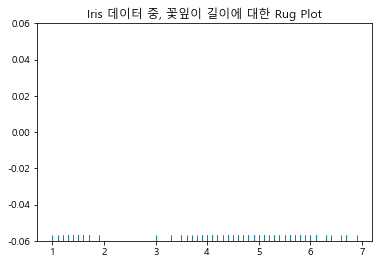

In [9]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎이 길이에 대한 Rug Plot")
plt.show()

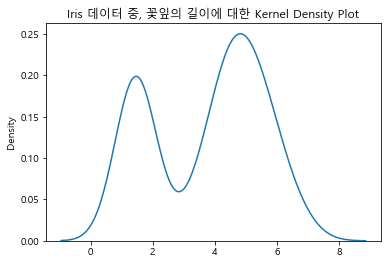

In [10]:
sns.kdeplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

C:\Users\khl06\anaconda3\envs\multi\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khl06\anaconda3\envs\multi\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


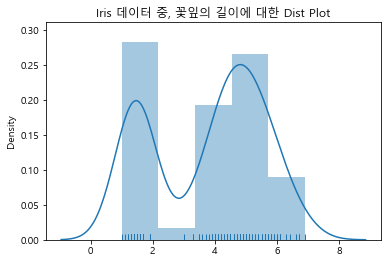

In [11]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

### 카운트 플롯

In [20]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


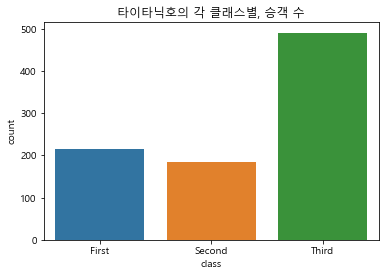

In [13]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

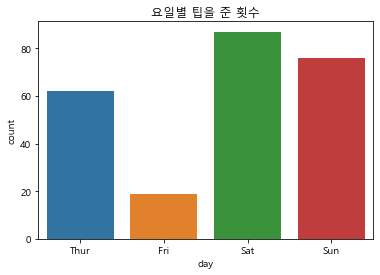

In [21]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

## **다차원 데이터**

### 2차원 실수형 데이터

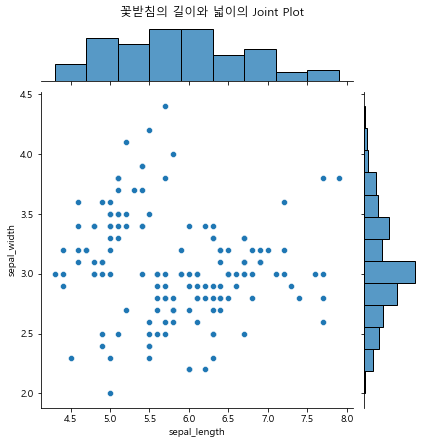

In [24]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

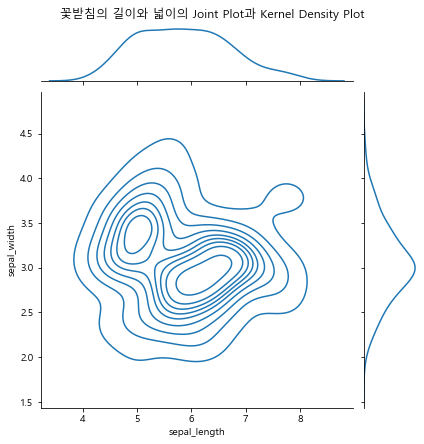

In [25]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot과 Kernel Density Plot", y=1.02)
plt.show()

### 다차원 실수형 데이터

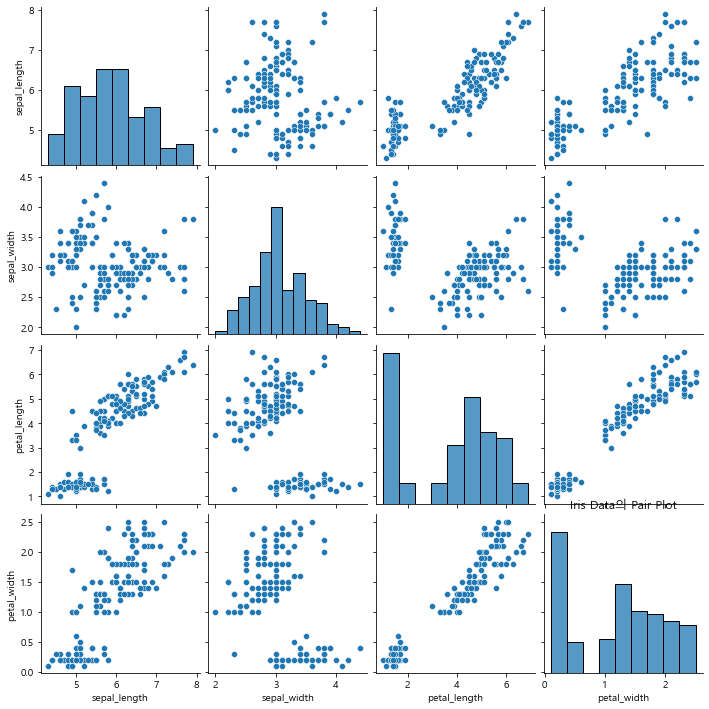

In [27]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

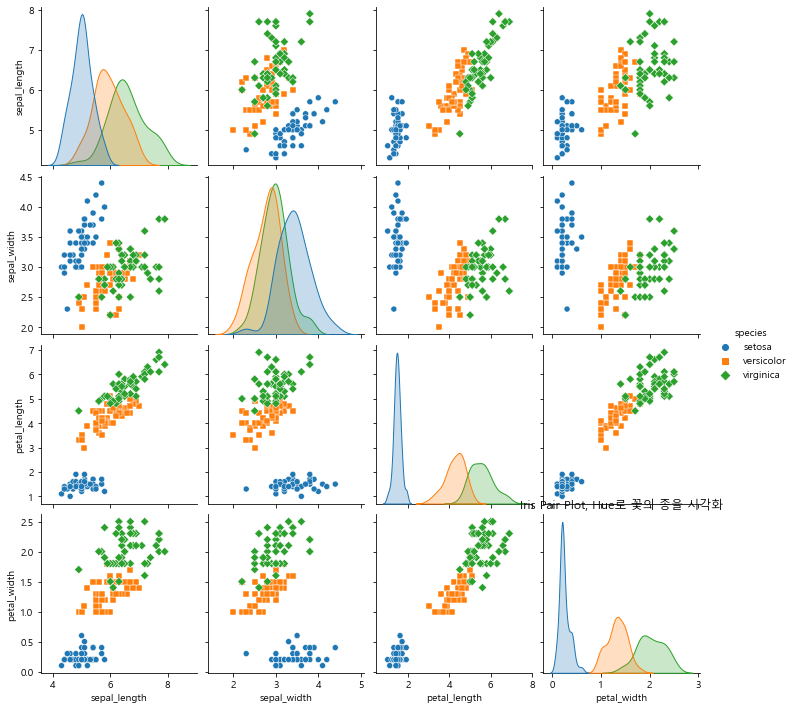

In [28]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

### 2차원 카테고리 데이터

In [29]:
titanic_size = titanic.pivot_table(index="class", columns="sex", aggfunc="size")

titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


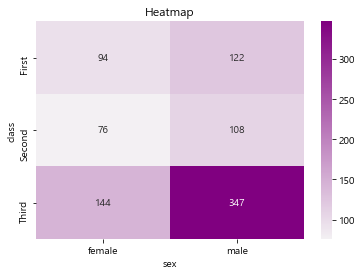

In [33]:
sns.heatmap(titanic_size,
            cmap=sns.light_palette("purple", as_cmap=True),
            annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

### 2차원 복합 데이터

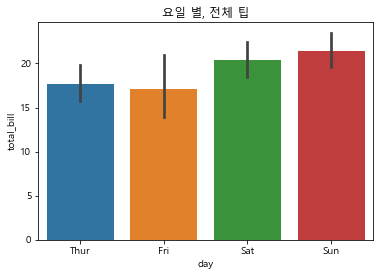

In [34]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일별, 전체 팁")
plt.show()

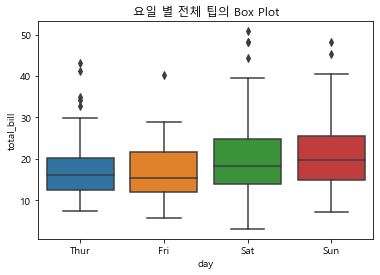

In [35]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일별 전체 팁의 Box Plot")
plt.show()

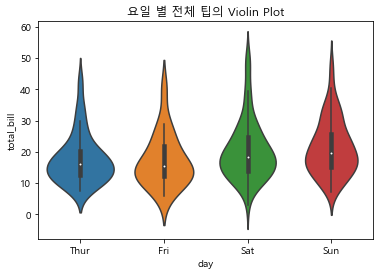

In [36]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일별 전체 팁의 Violin Plot")
plt.show()

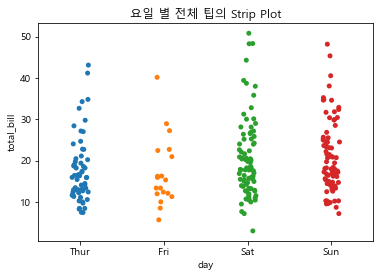

In [41]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일별 전체 팁의 Strip Plot")
plt.show()

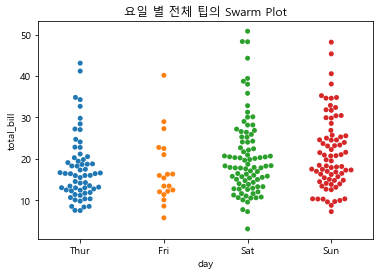

In [42]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일별 전체 팁의 Swarm Plot")
plt.show()

## **다차원 복합 데이터**

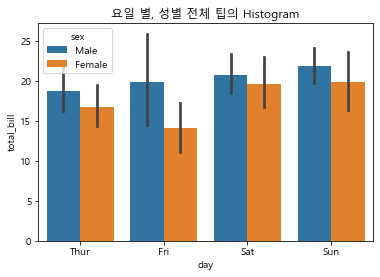

In [43]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일별, 성별 전체 팁의 Histogram")
plt.show()

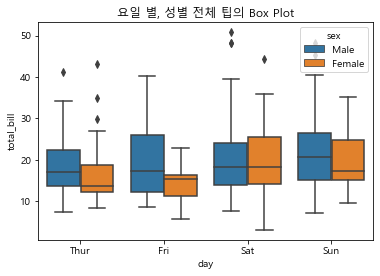

In [44]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일별, 성별 전체 팁의 Box Plot")
plt.show()

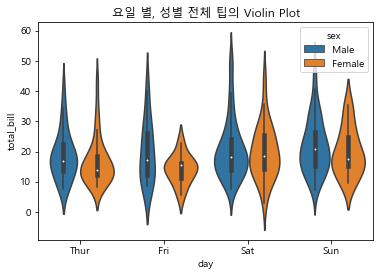

In [46]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일별, 성별 전체 팁의 Violin Plot")
plt.show()

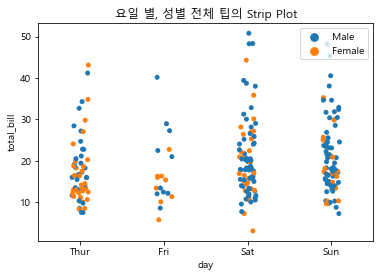

In [48]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

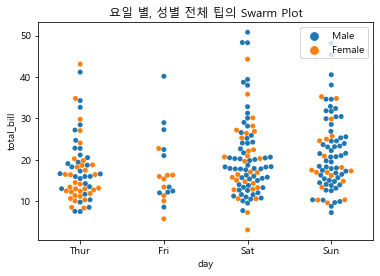

In [49]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일별, 성별 전체 팁의 Swarm Plot")
plt.legend(loc=1)
plt.show()

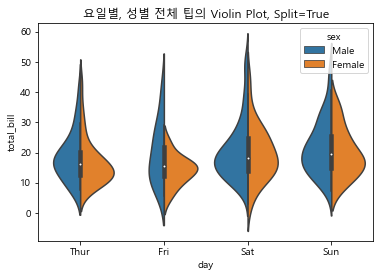

In [52]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
plt.title("요일별, 성별 전체 팁의 Violin Plot, Split=True")
plt.show()

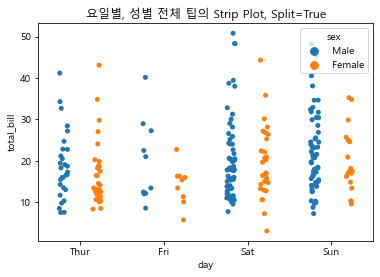

In [58]:
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True)
plt.title("요일별, 성별 전체 팁의 Strip Plot, Split=True")
plt.show()

C:\Users\khl06\anaconda3\envs\multi\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


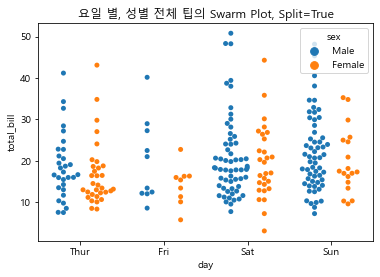

In [59]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot, Split=True")
plt.show()

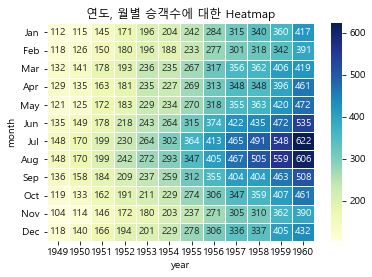

In [79]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1, cmap="YlGnBu")
plt.show()

In [80]:
# https://chrisalbon.com/code/python/data_visualization/seaborn_color_palettes/

## **catplot**

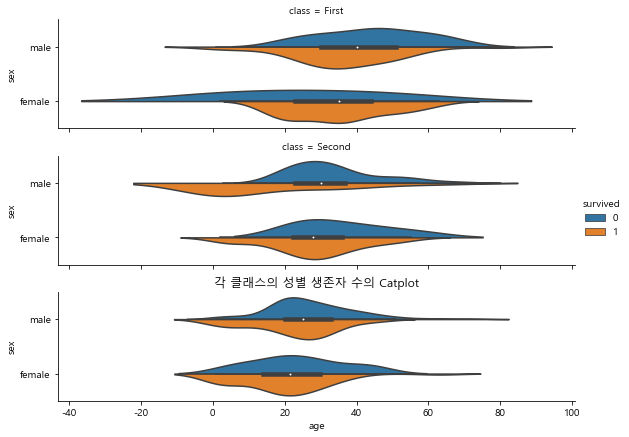

In [81]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

## **기타**

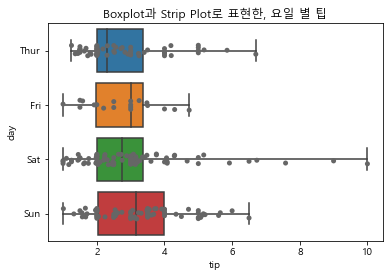

In [82]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

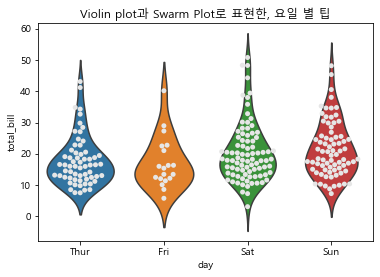

In [83]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()

## **스타일**

In [84]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

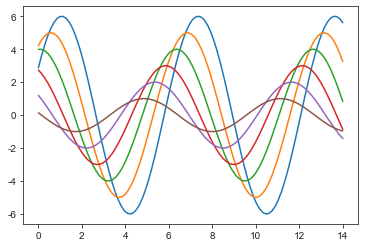

In [90]:
sns.set_style("ticks")   # darkgrid, whitegrid, dark, white, 그리고 ticks
sinplot()